# Extra Activity: Support Vector Machines

**Objective:** Understand the core concepts of Support Vector Machines (SVM), including the Maximal Margin Classifier, Support Vector Classifier (SVC), and the use of kernels for non-linear decision boundaries.

# Part 1 - Theorical Concepts

**Objective:**
Response a group of teorical questions about the concepts of the Support vector machine (SVM), Maximal margin classifier, Support vector classifier, and Kernels for nonlinear decision boundaries.

**Question 1:** In your own words, explain the difference between the Maximal Margin Classifier and the Support Vector Classifier. In which situations is the latter preferred?

**Answer:** The Maximal Margin Classifier is a theoretical model that aims to find the hyperplane that maximizes the margin between two classes in a dataset. It does this by focusing on the points that are closest to the decision boundary, known as support vectors. However, it requires that the data is linearly separable, meaning that there exists a hyperplane that can perfectly separate the two classes without any misclassifications.

The Support Vector Classifier (SVC), on the other hand, is a more flexible model that allows for some misclassifications by introducing a regularization parameter (C). This means that SVC can handle cases where the data is not perfectly separable, allowing it to find a balance between maximizing the margin and minimizing classification errors. SVC is preferred in situations where the data is noisy or not linearly separable, as it can still provide a robust decision boundary while accommodating some misclassifications.

**Question 2:** What is a soft margin and how does it help control the bias-variance tradeoff? 

**Answer:** A soft margin is a concept in Support Vector Machines (SVM) that allows for some misclassifications by introducing a regularization parameter (C). Instead of requiring that all data points be perfectly classified, the soft margin permits some points to fall on the wrong side of the decision boundary, which helps to create a more flexible model.

This flexibility is crucial in controlling the bias-variance tradeoff.

A soft margin helps to reduce variance by allowing the model to generalize better to unseen data, as it does not strictly adhere to the training data. By allowing some misclassifications, the model can avoid overfitting to noise in the training set, which would lead to high variance. At the same time, it maintains a certain level of bias by not fitting too closely to the training data, thus ensuring that the model remains robust and performs well on new data.

**Question 3:** Why and how are kernels used in SVM? Give an example of a situation that would require a kernel.

**Answer:** Kernels are used in Support Vector Machines (SVM) to enable the algorithm to handle non-linear decision boundaries. By applying a kernel function, SVM can implicitly map the input features into a higher-dimensional space where a linear separation is possible, even if the original data is not linearly separable.

This allows SVM to find complex decision boundaries without explicitly transforming the data, which can be computationally expensive.

For example, consider a dataset where two classes are arranged in concentric circles. In this case, a linear SVM would struggle to find a decision boundary that separates the two classes effectively. However, by using a radial basis function (RBF) kernel, the SVM can transform the data into a higher-dimensional space where a linear hyperplane can separate the classes. This makes kernels particularly useful for datasets with complex relationships between features.

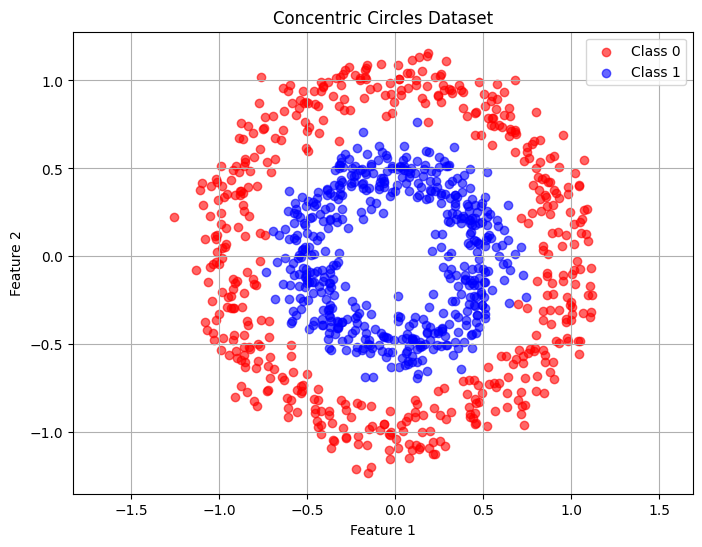

In [ ]:
# Show the example of the dataset where two classes are arranged in concentric circles.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Create a dataset with two classes in concentric circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.6)
plt.title('Concentric Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

**Question 4:** What is the difference between a linear kernel and a radial (RBF) kernel? What are the 
implications for the model?

**Answer:** The main difference between a linear kernel and a radial basis function (RBF) kernel lies in how they transform the input data and the types of decision boundaries they can create.

A linear kernel is simply the dot product of the input features, which means it does not transform the data and is suitable for linearly separable datasets. It creates a linear decision boundary in the original feature space. This is computationally efficient and works well when the classes can be separated by a straight line (or hyperplane in higher dimensions).

In contrast, an RBF kernel maps the input features into a higher-dimensional space using a Gaussian function. This allows the SVM to create non-linear decision boundaries, making it suitable for datasets that are not linearly separable. The RBF kernel can capture complex relationships between features and can adapt to various shapes of data distributions.

The implications for the model are significant. A linear kernel is simpler and faster to compute, making it a good choice for large datasets or when the data is known to be linearly separable. However, it may underperform on complex datasets. The RBF kernel, while more powerful and flexible, can lead to longer training times and may require careful tuning of hyperparameters (like the gamma parameter) to avoid overfitting or underfitting the data.

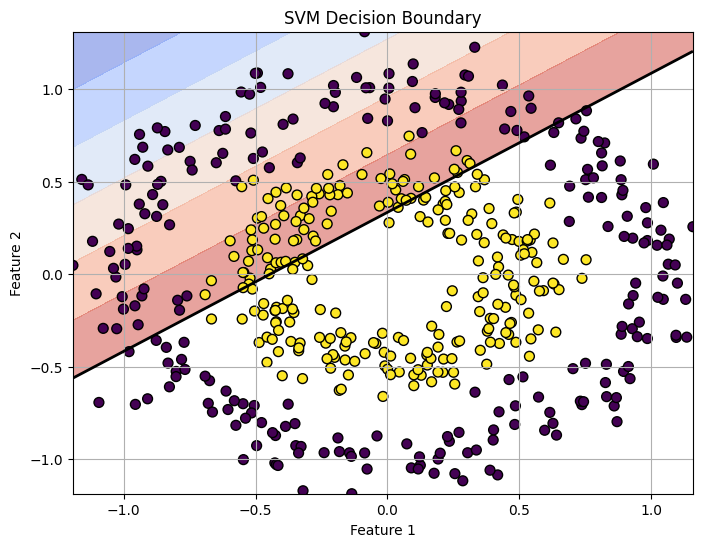

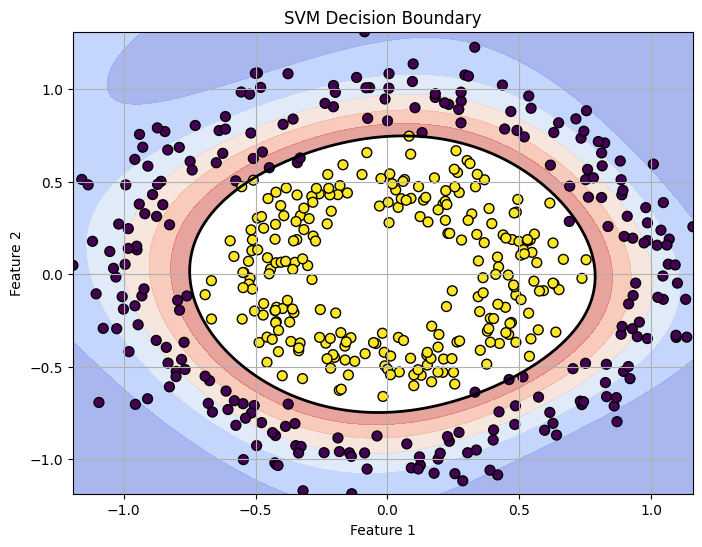

In [9]:
from sklearn.svm import SVC

# Function to plot predictions of SVM
def plot_predictions(svm, axes, figsize=(8, 6), X=None, y=None):
    plt.figure(figsize=figsize)
    plt.xlim(axes[0], axes[1])
    plt.ylim(axes[2], axes[3])
    
    # Create a grid to evaluate the model
    xx, yy = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                        np.linspace(axes[2], axes[3], 100))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.coolwarm, alpha=0.5)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    
    if X is not None and y is not None:
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.grid(True)
    plt.show()

# Generate a dataset with two classes in concentric circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Define axes for the plot
axes = [X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()]

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X, y)

# Plot the SVM linear decision boundary
plot_predictions(svm_linear, axes, figsize=(8,6), X=X, y=y)

# plot the SVM RBF decision boundary
plot_predictions(svm_rbf, axes, figsize=(8,6), X=X, y=y)

**Question 5:** What are support vectors and what role do they play in defining the decision boundary?

**Answer:** Support vectors are the data points that are closest to the decision boundary in a Support Vector Machine (SVM) model. They are critical in defining the position and orientation of the hyperplane that separates different classes in the dataset.

Support vectors are the only points that influence the decision boundary; all other points do not affect the model's outcome. The SVM algorithm focuses on these support vectors to maximize the margin between the classes, ensuring that the decision boundary is as far away from the nearest points of each class as possible. This is essential for creating a robust model that generalizes well to unseen data.

In summary, support vectors are the key elements that determine the SVM's decision boundary. They help to ensure that the model is not overly sensitive to noise in the data and that it maintains a good balance between bias and variance. By focusing on these critical points, SVM can create an effective classification model that performs well across various datasets.

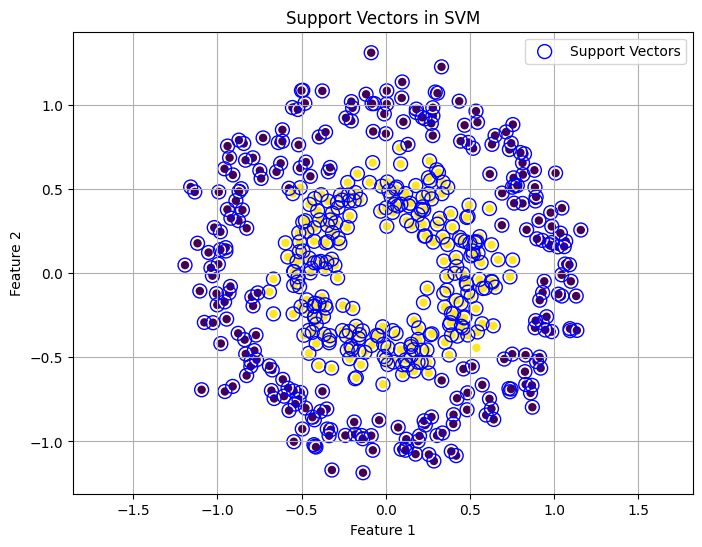

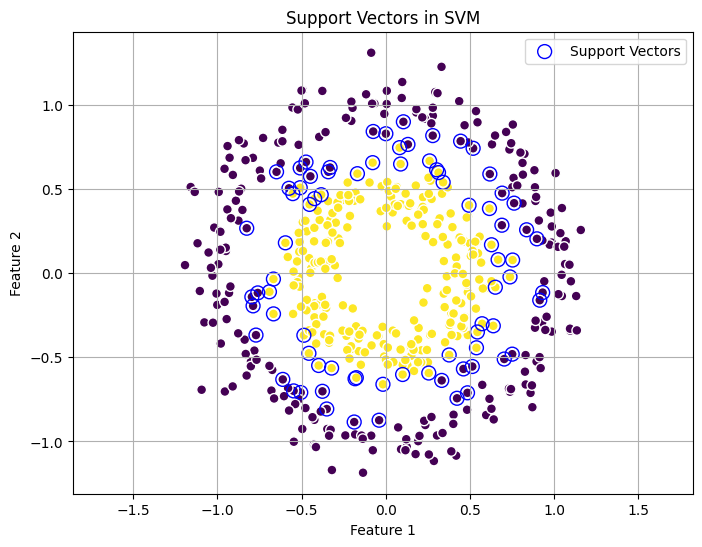

In [ ]:
# Example code to show the support vectors
def plot_support_vectors(svm, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='white', marker='o', s=50)
    
    # Plot support vectors
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                facecolors='none', s=100, edgecolors='blue', label='Support Vectors')
    
    plt.title('Support Vectors in SVM')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Plot support vectors for the linear SVM
plot_support_vectors(svm_linear, X, y)
# Plot support vectors for the RBF SVM
plot_support_vectors(svm_rbf, X, y)

# Part 2 - Practical Application

**Objective:**
Use the Heart dataset available in the ISLR2 package (R) or a similar binary classification dataset from sklearn/seaborn (Python). Alternatively, you may choose a different binary dataset.

In this notebook, we will use the "Heart Disease" dataset from the folder `dataset/Heart.csv` for the practical application of Support Vector Machines (SVM).

## 1. Load Libraries

We import the necessary libraries for data manipulation, preprocessing, modeling, and evaluation.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, RocCurveDisplay
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading and Initial Preparation

### 2.1 Load Dataset

We load the Heart dataset and perform an initial exploration.

In [2]:
# Define the paths
current_path = os.getcwd()
data_path = os.path.join(current_path, "datasets")

# Print the paths
print(f"Current path: {current_path}")
print(f"Data path: {data_path}")

Current path: /home/santiago/doc_subjects/IND2627_Intro_Stat/Extra_Activities/Lecture_10
Data path: /home/santiago/doc_subjects/IND2627_Intro_Stat/Extra_Activities/Lecture_10/datasets


In [3]:
# Load the dataset
heart_df = pd.read_csv(os.path.join(data_path, "Heart.csv"))

# Defin the target variable and features
target = 'AHD'

X = heart_df.drop(columns=[target]).copy()
# Delete the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in X.columns:
    X.drop(columns=['Unnamed: 0'], inplace=True)

y = heart_df[target].copy()

# Display basic dataset information
print("Dimensions of dataset (X):", X.shape)
print("Dimensions of dataset (y):", y.shape)

print("\nFirst 5 rows of X:")
display(X.head())

print("\nFirst 5 rows of y:")
display(y.head())

print("\nInformation of dataset X:")
display(X.info())

print("\nDescriptive statistics of X:")
display(X.describe())
display(X["ChestPain"].value_counts())
display(X["Thal"].value_counts())

print("\nDistribution of the target variable (y):")
display(y.value_counts())

Dimensions of dataset (X): (303, 13)
Dimensions of dataset (y): (303,)

First 5 rows of X:


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal



First 5 rows of y:


0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object


Information of dataset X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
dtypes: float64(2), int64(9), object(2)
memory usage: 30.9+ KB


None


Descriptive statistics of X:


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

Thal
normal        166
reversable    117
fixed          18
Name: count, dtype: int64


Distribution of the target variable (y):


AHD
No     164
Yes    139
Name: count, dtype: int64

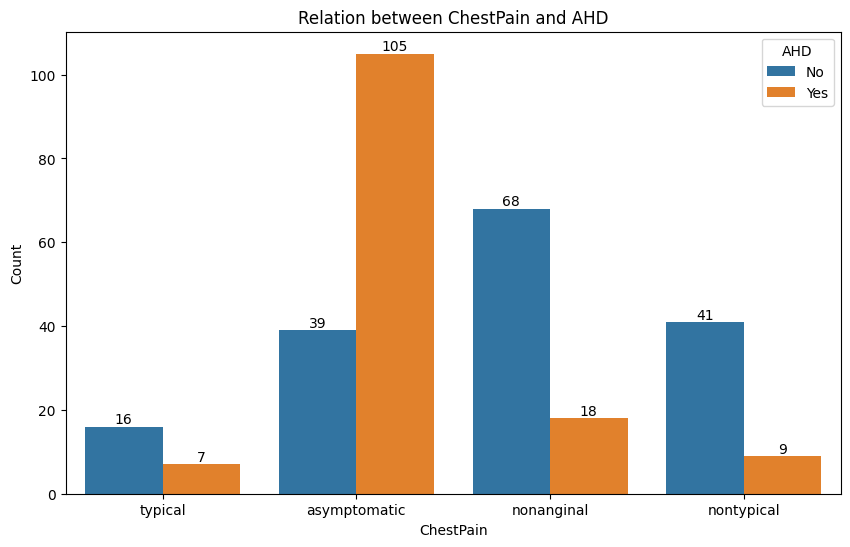

In [4]:
# Show the relation between ChestPain and AHD
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=heart_df, x='ChestPain', hue='AHD')
plt.title('Relation between ChestPain and AHD')
plt.xlabel('ChestPain')
plt.ylabel('Count')
plt.legend(title='AHD', loc='upper right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.show()

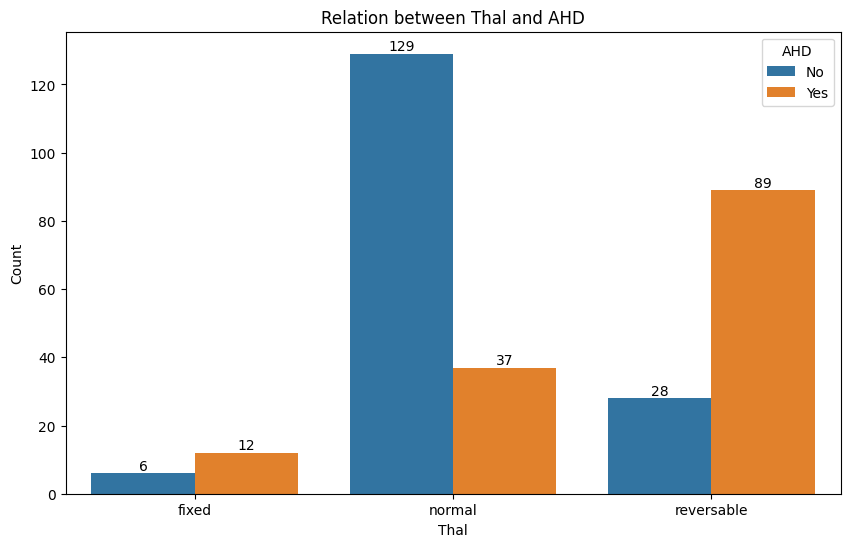

In [5]:
# Show the relation between Thal and AHD
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=heart_df, x='Thal', hue='AHD')
plt.title('Relation between Thal and AHD')
plt.xlabel('Thal')
plt.ylabel('Count')
plt.legend(title='AHD', loc='upper right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
    
plt.show()

### 2.2 Data Cleaning and Preprocessing

We check for missing values. If any are found, we handle them appropriately (e.g., by removing or imputing).

We treat to balance the dataset if necessary, focus in the Chest pain column and the target variable.

We divide the dataset into features and target variable. And we split the dataset into training and testing sets.

In [6]:
# Show the missing values in the dataset
print("Missing values per column in X:")
print(X.isnull().sum(), "\n")

print("Missing values in y:")
print(y.isnull().sum(), "\n")

Missing values per column in X:
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
dtype: int64 

Missing values in y:
0 



In [7]:
# Clean the missing values in the dataset (Drop rows with missing values)
X_clean = X.dropna()
y_clean = y[X_clean.index]
print("Dimensions of cleaned dataset (X_clean):", X_clean.shape)
print("Dimensions of cleaned dataset (y_clean):", y_clean.shape)

Dimensions of cleaned dataset (X_clean): (297, 13)
Dimensions of cleaned dataset (y_clean): (297,)


In [8]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
dtypes: float64(2), int64(9), object(2)
memory usage: 32.5+ KB


In [9]:
# Transform categorical variables into numerical ones
X_clean = pd.get_dummies(X_clean, drop_first=True)

# Save the names of bool columns for later use
bool_columns = X_clean.select_dtypes(include=['bool']).columns.tolist()

# Convert boolean columns to integers
X_clean[bool_columns] = X_clean[bool_columns].astype(int)

# Convert the target variable to numerical values
y_clean = y_clean.map({'No': 0, 'Yes': 1})

# Display the cleaned dataset
print("First 5 rows of cleaned X:")
display(X_clean.head())
print("First 5 rows of cleaned y:")
display(y_clean.head())

First 5 rows of cleaned X:


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0


First 5 rows of cleaned y:


0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [10]:
# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

# Display the dimensions of the training and testing sets
print("Dimensions of training set (X_train):", X_train.shape)
print("Dimensions of training set (y_train):", y_train.shape)
print("Dimensions of testing set (X_test):", X_test.shape)
print("Dimensions of testing set (y_test):", y_test.shape)

Dimensions of training set (X_train): (207, 16)
Dimensions of training set (y_train): (207,)
Dimensions of testing set (X_test): (90, 16)
Dimensions of testing set (y_test): (90,)


In [11]:
# Normalize the numerical columns, except for the
# columns that were already saved as bool columns
x_columns = X_clean.columns.difference(bool_columns)

# Create a copy for save the scaled data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Prepare the StandardScaler with the train set
scaler = StandardScaler()

X_train_scaled[x_columns] = scaler.fit_transform(X_train_scaled[x_columns])
X_test_scaled[x_columns] = scaler.transform(X_test_scaled[x_columns])

## 3. Model Fitting

### 3.1 Support Vector Classifier (Linear Kernel)

We fit a Support Vector Classifier (SVC) with a linear kernel.
It's important to set `probability=True` if we want to obtain probabilities for the ROC curve.

In [12]:
svc_linear_ne = SVC(kernel='linear', probability=True, random_state=42)
svc_linear_ne.fit(X_train, y_train)

print("SVC with linear kernel and no scaled data fitted successfully.")

SVC with linear kernel and no scaled data fitted successfully.


In [13]:
svc_linear_scaled = SVC(kernel='linear', probability=True, random_state=42)
svc_linear_scaled.fit(X_train_scaled, y_train)

print("SVC with linear kernel and scaled data fitted successfully.")

SVC with linear kernel and scaled data fitted successfully.


### 3.2 Support Vector Machine (Radial Kernel)

We fit a Support Vector Machine (SVM) with a radial basis function (RBF) kernel.
It's important to set `probability=True` if we want to obtain probabilities for the ROC curve.

In [14]:
svm_rbf_ne = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf_ne.fit(X_train, y_train)

print("SVM with radial (RBF) kernel and no scaled data fitted successfully.")

SVM with radial (RBF) kernel and no scaled data fitted successfully.


In [15]:
svm_rbf_scaled = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf_scaled.fit(X_train_scaled, y_train)

print("SVM with Radial (RBF) kernel and scaled data fitted successfully.")

SVM with Radial (RBF) kernel and scaled data fitted successfully.


## 4. Model Evaluation

### 4.1 Test Accuracy

We report the accuracy on the test set for both models.

In [16]:
# Predictions on the test set
y_pred_linear_ne = svc_linear_ne.predict(X_test)
y_pred_linear_scaled = svc_linear_scaled.predict(X_test_scaled)
y_pred_rbf_ne = svm_rbf_ne.predict(X_test)
y_pred_rbf_scaled = svm_rbf_scaled.predict(X_test_scaled)

# Accuracy
accuracy_linear_ne = accuracy_score(y_test, y_pred_linear_ne)
accuracy_linear_scaled = accuracy_score(y_test, y_pred_linear_scaled)
accuracy_rbf_ne = accuracy_score(y_test, y_pred_rbf_ne)
accuracy_rbf_scaled = accuracy_score(y_test, y_pred_rbf_scaled)

print(f"Test Accuracy - SVC (Linear Kernel) Not scaled: {accuracy_linear_ne:.4f}")
print(f"Test Accuracy - SVC (Linear Kernel) Scaled: {accuracy_linear_scaled:.4f}")
print(f"Test Accuracy - SVM (RBF Kernel) Not scaled: {accuracy_rbf_ne:.4f}")
print(f"Test Accuracy - SVM (RBF Kernel) Scaled: {accuracy_rbf_scaled:.4f}")

Test Accuracy - SVC (Linear Kernel) Not scaled: 0.8778
Test Accuracy - SVC (Linear Kernel) Scaled: 0.8778
Test Accuracy - SVM (RBF Kernel) Not scaled: 0.6667
Test Accuracy - SVM (RBF Kernel) Scaled: 0.8778


### 4.2 Classification Report and Confusion Matrix

We generate a classification report for both models, which includes precision, recall, and F1-score. 

We also create confusion matrices to visualize the performance of the models.

In [17]:
# Classification report and confusion matrix for the SVC with linear kernel
print("Classification Report and confusion matrix for SVC (Linear Kernel) not scaled:")
print("----------------------------------------------------------------------")
print(classification_report(y_test, y_pred_linear_ne))
print(confusion_matrix(y_test, y_pred_linear_ne))
print("\n")

# Classification report and confusion matrix for the SVC with linear kernel and scaled data
print("Classification Report and confusion matrix for SVC (Linear Kernel) scaled:")
print("----------------------------------------------------------------------")
print(classification_report(y_test, y_pred_linear_scaled))
print(confusion_matrix(y_test, y_pred_linear_scaled))
print("\n")

# Classification report and confusion matrix for the SVM with RBF kernel and no scaled data
print("Classification Report and confusion matrix for SVM (RBF Kernel) not scaled:")
print("----------------------------------------------------------------------")
print(classification_report(y_test, y_pred_rbf_ne))
print(confusion_matrix(y_test, y_pred_rbf_ne))
print("\n")

# Classification report and confusion matrix for the SVM with RBF kernel and scaled data
print("Classification Report and confusion matrix for SVM (RBF Kernel) scaled:")
print("----------------------------------------------------------------------")
print(classification_report(y_test, y_pred_rbf_scaled))
print(confusion_matrix(y_test, y_pred_rbf_scaled))

Classification Report and confusion matrix for SVC (Linear Kernel) not scaled:
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        49
           1       0.94      0.78      0.85        41

    accuracy                           0.88        90
   macro avg       0.89      0.87      0.87        90
weighted avg       0.89      0.88      0.88        90

[[47  2]
 [ 9 32]]


Classification Report and confusion matrix for SVC (Linear Kernel) scaled:
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        49
           1       0.94      0.78      0.85        41

    accuracy                           0.88        90
   macro avg       0.89      0.87      0.87        90
weighted avg       0.89      0.88      0.88        90

[[47  2]
 [ 9 32]]


Classifi

### 4.3 ROC Curves and AUC

We present the ROC curves and the Area Under the Curve (AUC) for all models.

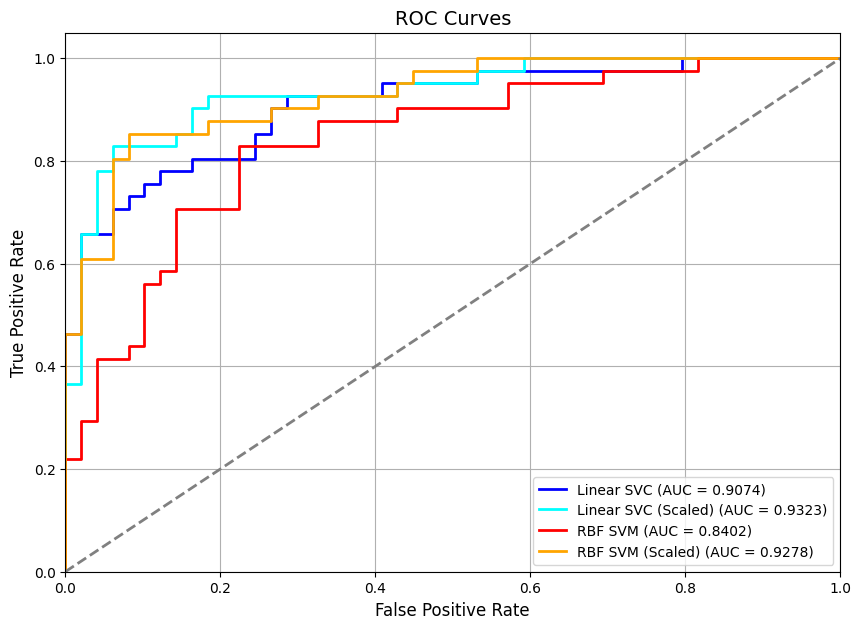

AUC - SVC (Linear Kernel): 0.9074
AUC - SVC (Linear Kernel, Scaled): 0.9323
AUC - SVM (RBF Kernel): 0.8402
AUC - SVM (RBF Kernel, Scaled): 0.9278


In [18]:
# Probabilities for the positive class
y_prob_linear_ne = svc_linear_ne.predict_proba(X_test_scaled)[:, 1]
y_prob_linear_scaled = svc_linear_scaled.predict_proba(X_test_scaled)[:, 1]
y_prob_rbf_ne = svm_rbf_ne.predict_proba(X_test_scaled)[:, 1]
y_prob_rbf_scaled = svm_rbf_scaled.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for the linear models
fpr_linear_ne, tpr_linear_ne, _ = roc_curve(y_test, y_prob_linear_ne)
roc_auc_linear_ne = auc(fpr_linear_ne, tpr_linear_ne)

fpr_linear_scaled, tpr_linear_scaled, _ = roc_curve(y_test, y_prob_linear_scaled)
roc_auc_linear_scaled = auc(fpr_linear_scaled, tpr_linear_scaled)

# Calculate ROC curve and AUC for the RBF models
fpr_rbf_ne, tpr_rbf_ne, _ = roc_curve(y_test, y_prob_rbf_ne)
roc_auc_rbf_ne = auc(fpr_rbf_ne, tpr_rbf_ne)

fpr_rbf_scaled, tpr_rbf_scaled, _ = roc_curve(y_test, y_prob_rbf_scaled)
roc_auc_rbf_scaled = auc(fpr_rbf_scaled, tpr_rbf_scaled)

# Plot the ROC curves
plt.figure(figsize=(10, 7))

# ROC Curve for Linear SVCs
plt.plot(fpr_linear_ne, tpr_linear_ne, color='blue', lw=2,
        label=f'Linear SVC (AUC = {roc_auc_linear_ne:.4f})')

plt.plot(fpr_linear_scaled, tpr_linear_scaled, color='cyan', lw=2,
        label=f'Linear SVC (Scaled) (AUC = {roc_auc_linear_scaled:.4f})')

# ROC Curve for RBF SVMs
plt.plot(fpr_rbf_ne, tpr_rbf_ne, color='red', lw=2,
        label=f'RBF SVM (AUC = {roc_auc_rbf_ne:.4f})')

plt.plot(fpr_rbf_scaled, tpr_rbf_scaled, color='orange', lw=2,
        label=f'RBF SVM (Scaled) (AUC = {roc_auc_rbf_scaled:.4f})')

# No-discrimination line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()

print(f"AUC - SVC (Linear Kernel): {roc_auc_linear_ne:.4f}")
print(f"AUC - SVC (Linear Kernel, Scaled): {roc_auc_linear_scaled:.4f}")
print(f"AUC - SVM (RBF Kernel): {roc_auc_rbf_ne:.4f}")
print(f"AUC - SVM (RBF Kernel, Scaled): {roc_auc_rbf_scaled:.4f}")

## 5. Discussion

### 5.1 Model Performance

* **Which model performed better?**
* **Justify your answer using metrics and plots.**

Based on the results, the Support Vector Classifier (SVC) with a linear kernel on scaled data performed the best.

The importance of scaling the data is immediately evident when comparing the models. The SVM with an RBF kernel performed poorly on unscaled data, with a test accuracy of only 0.6667 and an AUC of 0.8402. However, after scaling, its accuracy jumped to 0.8778, matching the linear kernel models, and its AUC improved to 0.9278.

While both the scaled linear SVC and the scaled RBF SVM achieved the same test accuracy (0.8778), the linear SVC on scaled data achieved the highest Area Under the Curve (AUC) with a value of 0.9323. The ROC curve for the scaled Linear SVC (the cyan line in the plot) is also slightly above the other curves, indicating it has the best overall performance in distinguishing between the 'Yes' and 'No' classes across all classification thresholds. The classification reports for the scaled models are very similar, both showing strong precision and recall, with a weighted F1-score of 0.88. Given the superior AUC, the scaled Linear SVC is the preferable model.

### 5.2 Support Vectors

* **How many support vectors were used in each model?**
* **What does this suggest about the decision boundary complexity?**

In [19]:
n_support_linear_ne = svc_linear_ne.n_support_.sum()
n_support_linear_scaled = svc_linear_scaled.n_support_.sum()
n_support_rbf_ne = svm_rbf_ne.n_support_.sum()
n_support_rbf_scaled = svm_rbf_scaled.n_support_.sum()

# Support vectors can also be viewed per class:
# print(f"Support vectors per class (Linear ne): {svc_linear_ne.n_support_}")
# print(f"Support vectors per class (Linear scaled): {svc_linear_scaled.n_support_}")
# print(f"Support vectors per class (RBF ne): {svm_rbf_ne.n_support_}")
# print(f"Support vectors per class (RBF scaled): {svm_rbf_scaled.n_support_}")
print(f"Total number of support vectors - SVC (Linear Kernel): {n_support_linear_ne}")
print(f"Total number of support vectors - SVC (Linear Kernel, Scaled): {n_support_linear_scaled}")
print(f"Total number of support vectors - SVM (RBF Kernel): {n_support_rbf_ne}")
print(f"Total number of support vectors - SVM (RBF Kernel, Scaled): {n_support_rbf_scaled}")

# Calculate the percentage of support vectors over the total training samples
total_samples_train_ne = X_train.shape[0]
total_samples_train_scaled = X_train_scaled.shape[0]

print(f"Percentage of support vectors (Linear ne) over total training samples: {(n_support_linear_ne / total_samples_train_ne) * 100:.2f}%")
print(f"Percentage of support vectors (Linear scaled) over total training samples: {(n_support_linear_scaled / total_samples_train_scaled) * 100:.2f}%")
print(f"Percentage of support vectors (RBF ne) over total training samples: {(n_support_rbf_ne / total_samples_train_ne) * 100:.2f}%")
print(f"Percentage of support vectors (RBF scaled) over total training samples: {(n_support_rbf_scaled / total_samples_train_scaled) * 100:.2f}%")

Total number of support vectors - SVC (Linear Kernel): 84
Total number of support vectors - SVC (Linear Kernel, Scaled): 83
Total number of support vectors - SVM (RBF Kernel): 182
Total number of support vectors - SVM (RBF Kernel, Scaled): 132
Percentage of support vectors (Linear ne) over total training samples: 40.58%
Percentage of support vectors (Linear scaled) over total training samples: 40.10%
Percentage of support vectors (RBF ne) over total training samples: 87.92%
Percentage of support vectors (RBF scaled) over total training samples: 63.77%


The number of support vectors used in each model was as follows:
* **SVC (Linear Kernel, not scaled):** 84 support vectors (40.58% of training data).
* **SVC (Linear Kernel, scaled):** 83 support vectors (40.10% of training data).
* **SVM (RBF Kernel, not scaled):** 182 support vectors (87.92% of training data).
* **SVM (RBF Kernel, scaled):** 132 support vectors (63.77% of training data).

The linear kernel models used significantly fewer support vectors than the RBF kernel models. This suggests that the linear models found a simpler, more generalized decision boundary.

A larger number of support vectors, as seen with the RBF kernel, suggests a more complex decision boundary that is more tightly fitted to the training data. The unscaled RBF model used a very high percentage of the training data as support vectors (87.92%), which often indicates overfitting and explains its poor test performance. Scaling the data for the RBF model not only improved its accuracy but also reduced its number of support vectors to 132, suggesting a slightly less complex and better-generalizing boundary.

The fact that all models, particularly the RBF models, required a high percentage of the training data as support vectors indicates that the two classes (presence or absence of heart disease) are not easily separable and likely have considerable overlap in the feature space.

# Part 3 - Final Discussion

**Objective:**
Based on the Theoretical Concepts and Practical Application, discuss and analyze a group of questions that integrate both parts.

**Question 1:** What is the trade-off between interpretability and flexibility in SVM models?

**Answer:** The trade-off between interpretability and flexibility in SVM models is a crucial consideration when choosing the appropriate model for a given task.

On one hand, SVM models with linear kernels are more interpretable because they create a straightforward decision boundary that can be easily visualized and understood. The coefficients of the linear model can provide insights into the importance of each feature in making predictions. This interpretability is beneficial in domains where understanding the model's decision-making process is essential, such as healthcare or finance.

On the other hand, SVM models with non-linear kernels, such as the radial basis function (RBF) kernel, offer greater flexibility in capturing complex relationships in the data. These models can create intricate decision boundaries that can lead to better performance on challenging datasets. However, this increased flexibility comes at the cost of interpretability, as the decision boundary becomes more difficult to visualize and understand. The model's behavior may be less transparent, making it harder to explain why certain predictions are made.

In practice, the choice between interpretability and flexibility often depends on the specific application and the importance of understanding the model's decisions. In scenarios where model transparency is critical, a linear SVM may be preferred despite its limitations in handling complex data. Conversely, in cases where predictive performance is paramount and the underlying relationships are intricate, a non-linear SVM may be more suitable, even if it sacrifices some interpretability.

**Question 2:** In which real-world scenarios would you recommend using SVMs?

**Answer:** Support Vector Machines (SVMs) are versatile and powerful classification algorithms that can be applied to various real-world scenarios. Here are some situations where SVMs are particularly effective:

1. **Medical Diagnosis:** In healthcare, SVMs can be used for diagnosing diseases based on patient data, such as predicting the presence of heart disease or cancer. Their ability to handle non-linear relationships in medical features can lead to improved diagnostic accuracy.

2. **Financial Forecasting:** SVMs can be applied in finance for credit scoring, fraud detection, and stock market prediction. Their ability to model complex relationships in financial data can lead to better decision-making.

3. **Anomaly Detection:** SVMs can be used for detecting anomalies or outliers in datasets, such as identifying fraudulent transactions or network intrusions. The one-class SVM variant is particularly useful for this purpose, as it can learn the normal behavior of a dataset and flag deviations.

In summary, SVMs are recommended in scenarios where the data is high-dimensional, complex, and potentially non-linearly separable. Their robustness to noise and ability to create flexible decision boundaries make them a valuable tool in various domains, from medical diagnosis to financial forecasting. However, it is essential to consider the interpretability of the model and the specific requirements of the application when choosing SVMs as a solution.